In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [96]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [97]:
data1 = pd.read_csv("telemetry_1.csv")
data2 = pd.read_csv("telemetry_2.csv")
data3=pd.read_csv("vehicle_data.csv")

In [98]:
data3

,id,datasource,tank_capacity,rated_mpg
0,vehicle_1,source_1,18.0,35
1,vehicle_2,source_1,15.8,32
2,vehicle_3,source_2,15.8,24
3,vehicle_4,source_1,13.0,32
4,vehicle_5,source_2,23.0,22
5,vehicle_6,source_2,19.0,56
6,vehicle_7,source_2,23.0,21
7,vehicle_8,source_2,18.5,21
8,vehicle_9,source_1,17.9,24
9,vehicle_10,source_2,26.0,21


In [99]:
d1 = data1.drop_duplicates()

In [100]:
d2 = data2.drop_duplicates()

In [101]:
d2_pivot = d2.pivot_table(index=['vehicle_id', 'timestamp'], columns='name', values='val').reset_index()

In [102]:
merged_data = pd.merge(d1, d2_pivot, on=['vehicle_id', 'timestamp'], how='outer')

In [103]:
merged_data['speed'] = merged_data['speed_x'].combine_first(merged_data['speed_y'])
merged_data['odometer'] = merged_data['odometer_x'].combine_first(merged_data['odometer_y'])
merged_data['fuel_level'] = merged_data['fuel_level_x'].combine_first(merged_data['fuel_level_y'])

# Drop the unnecessary columns
merged_data = merged_data.drop(columns=['speed_x', 'speed_y', 'odometer_x', 'odometer_y', 'fuel_level_x', 'fuel_level_y'])

In [104]:
merged_data

,vehicle_id,timestamp,speed,odometer,fuel_level
0,vehicle_4,2024-06-06 14:26:23-07:00,64.2,NaN,NaN
1,vehicle_8,2024-07-05 22:24:12.856000-07:00,1.6,12048.0,NaN
2,vehicle_3,2024-06-20 12:57:59.306000-07:00,NaN,NaN,45.0
3,vehicle_10,2024-07-24 18:04:23.776000-07:00,36.2,1434.7,NaN
4,vehicle_11,2024-07-06 11:08:03-07:00,29.5,NaN,NaN
...,...,...,...,...,...
681074,vehicle_9,2024-08-01 02:59:56+05:30,26.7,NaN,NaN
681075,vehicle_9,2024-08-01 05:25:10+05:30,NaN,6281.0,56.0
681076,vehicle_9,2024-08-01 05:25:26+05:30,18.8,NaN,NaN
681077,vehicle_9,2024-08-01 05:26:10+05:30,NaN,6281.0,56.0


In [105]:
final=merged_data.drop_duplicates()

In [106]:
data_cleaned = merged_data.dropna(how='all')


In [107]:
data_cleaned

,vehicle_id,timestamp,speed,odometer,fuel_level
0,vehicle_4,2024-06-06 14:26:23-07:00,64.2,NaN,NaN
1,vehicle_8,2024-07-05 22:24:12.856000-07:00,1.6,12048.0,NaN
2,vehicle_3,2024-06-20 12:57:59.306000-07:00,NaN,NaN,45.0
3,vehicle_10,2024-07-24 18:04:23.776000-07:00,36.2,1434.7,NaN
4,vehicle_11,2024-07-06 11:08:03-07:00,29.5,NaN,NaN
...,...,...,...,...,...
681074,vehicle_9,2024-08-01 02:59:56+05:30,26.7,NaN,NaN
681075,vehicle_9,2024-08-01 05:25:10+05:30,NaN,6281.0,56.0
681076,vehicle_9,2024-08-01 05:25:26+05:30,18.8,NaN,NaN
681077,vehicle_9,2024-08-01 05:26:10+05:30,NaN,6281.0,56.0


In [108]:
# Use the correct DataFrame name
# Calculate the average speed for each vehicle
avg_speed = merged_data.groupby('vehicle_id')['speed'].mean().reset_index()
print(avg_speed.columns)
avg_odo = merged_data.groupby('vehicle_id')['odometer'].mean().reset_index()
print(avg_odo.columns)
avg_fuel= merged_data.groupby('vehicle_id')['fuel_level'].mean().reset_index()
print(avg_fuel.columns)


Index(['vehicle_id', 'speed'], dtype='object')
Index(['vehicle_id', 'odometer'], dtype='object')
Index(['vehicle_id', 'fuel_level'], dtype='object')


<Figure size 900x500 with 0 Axes>

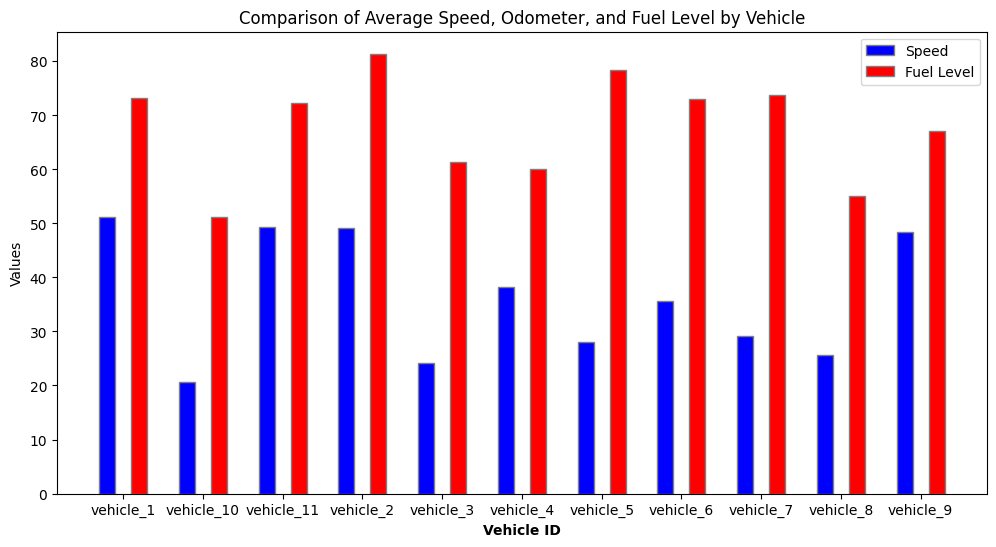

In [109]:
# Plot average speed by vehicle
plt.figure(figsize=(9, 5))
avg_data = pd.merge(avg_speed, avg_odo, on='vehicle_id')
avg_data = pd.merge(avg_data, avg_fuel, on='vehicle_id')

# Bar width and positions
bar_width = 0.2
r1 = np.arange(len(avg_data))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting each bar group
plt.bar(r1, avg_data['speed'], color='b', width=bar_width, edgecolor='grey', label='Speed')
plt.bar(r3, avg_data['fuel_level'], color='r', width=bar_width, edgecolor='grey', label='Fuel Level')

# Adding labels
plt.xlabel('Vehicle ID', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(avg_data))], avg_data['vehicle_id'])
plt.ylabel('Values')
plt.title('Comparison of Average Speed, Odometer, and Fuel Level by Vehicle')

# Adding legend
plt.legend()

# Show the plot
plt.show()

In [110]:
Q1 = merged_data['speed'].quantile(0.25)
Q3 = merged_data['speed'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = merged_data[(merged_data['speed'] >= lower_bound) & (merged_data['speed'] <= upper_bound)]

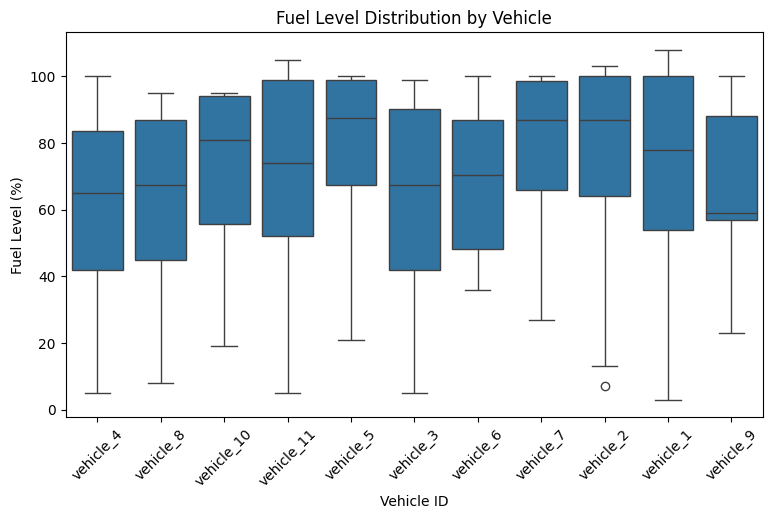

In [111]:
# Plot fuel level distribution by vehicle
plt.figure(figsize=(9, 5))
sns.boxplot(x='vehicle_id', y='fuel_level', data=df_no_outliers)
plt.xlabel('Vehicle ID')
plt.ylabel('Fuel Level (%)')
plt.title('Fuel Level Distribution by Vehicle')
plt.xticks(rotation=45)
plt.show()

In [112]:
avg_speed = merged_data.groupby('vehicle_id')['speed'].mean()
avg_odo = merged_data.groupby('vehicle_id')['odometer'].mean()
avg_fuel_usage = merged_data.groupby('vehicle_id')['fuel_level'].mean()
print(avg_speed, avg_odo,avg_fuel_usage)

vehicle_id
vehicle_1     51.202431
vehicle_10    20.653169
vehicle_11    49.291570
vehicle_2     49.143277
vehicle_3     24.222613
vehicle_4     38.265950
vehicle_5     28.042438
vehicle_6     35.592612
vehicle_7     29.127244
vehicle_8     25.628106
vehicle_9     48.381843
Name: speed, dtype: float64 vehicle_id
vehicle_1     15458.849147
vehicle_10     1065.787780
vehicle_11    27586.656881
vehicle_2     16669.212560
vehicle_3      3337.350977
vehicle_4      4319.318046
vehicle_5      2285.054756
vehicle_6      2885.079336
vehicle_7      5997.614080
vehicle_8     11160.464353
vehicle_9      3590.983473
Name: odometer, dtype: float64 vehicle_id
vehicle_1     73.250984
vehicle_10    51.199826
vehicle_11    72.219993
vehicle_2     81.415304
vehicle_3     61.274772
vehicle_4     60.045616
vehicle_5     78.324221
vehicle_6     73.045283
vehicle_7     73.793058
vehicle_8     55.130553
vehicle_9     67.082665
Name: fuel_level, dtype: float64


In [123]:
final_data=merged_data['fuel_level']

In [124]:
# Calculate distance traveled as the absolute difference in odometer readings
merged_data['distance'] = merged_data['odometer'].diff().abs()

# Calculate fuel consumed as the absolute difference in fuel level readings
merged_data['fuel_consumed'] = merged_data['fuel_level'].diff().abs()

# Replace zero or negative values in fuel consumption with NaN
merged_data['fuel_consumed'] = merged_data['fuel_consumed'].replace(0, np.nan)

# Calculate fuel economy
merged_data['fuel_economy'] = merged_data['distance'] / merged_data['fuel_consumed']

# Aggregate fuel economy by vehicle
fuel_economy_by_vehicle = merged_data.groupby('vehicle_id')['fuel_economy'].mean().reset_index()
print(fuel_economy_by_vehicle)


    vehicle_id  fuel_economy
0    vehicle_1    158.021199
1   vehicle_10     70.185868
2   vehicle_11    250.562939
3    vehicle_2    150.304864
4    vehicle_3     87.736756
5    vehicle_4    138.987118
6    vehicle_5     59.048766
7    vehicle_6     71.503398
8    vehicle_7    122.965442
9    vehicle_8    224.687308
10   vehicle_9    137.658164
